Assignment 1.1
--------------

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
#Step1: Simulate a dice roll
def roll_dice():
    return random.randint(1, 6)

#Step2: Simulate a session of dice rolls
def simulate_session(k):
    return [roll_dice() for _ in range(k)]

#Step3: Calculate the statistics for a session
def calculate_statistics(session):
    z6 = session.count(6)
    q6 = z6 / len(session)
    x_bar = sum(session) / len(session)
    x_median = np.median(session)
    return z6, q6, x_bar, x_median

#Step4: Simulate multiple sessions and calculate the statistics for each session
def simulate_sessions(n, k):
    sessions = [simulate_session(k) for _ in range(n)]
    statistics = [calculate_statistics(session) for session in sessions]
    return statistics

#Step5: Plot the histogram of the statistics
def plot_histogram(statistics):
    z6s, q6s, x_bars, x_medians = zip(*statistics)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(z6s, bins=range(1, 7), edgecolor='black')
    plt.title('z6')

    plt.subplot(2, 2, 2)
    plt.hist(q6s, bins=10, edgecolor='black')
    plt.title('q6')

    plt.subplot(2, 2, 3)
    plt.hist(x_bars, bins=10, edgecolor='black')
    plt.title('x_bar')

    plt.subplot(2, 2, 4)
    plt.hist(x_medians, bins=range(1, 7), edgecolor='black')
    plt.title('x_median')

    plt.tight_layout()
    plt.show()

#Step6: Run the simulation for different values of n and k
for n, k in [(100, 10), (1000, 10), (100, 100), (1000, 100)]:
    print(f"n={n}, k={k}")
    statistics = simulate_sessions(n, k)
    plot_histogram(statistics)

Assignment 1.2
----

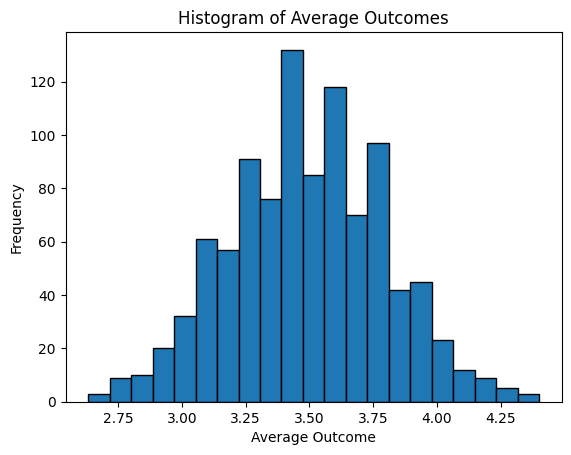

Die is fair: True


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_die_rolls(k):
    return np.random.randint(1, 7, k)

def calculate_average(rolls):
    return np.mean(rolls)

def simulate_n_experiments(n, k):
    averages = []
    for _ in range(n):
        rolls = simulate_die_rolls(k)
        averages.append(calculate_average(rolls))
    return averages

def plot_histogram(averages):
    plt.hist(averages, bins='auto', edgecolor='black')
    plt.title('Histogram of Average Outcomes')
    plt.xlabel('Average Outcome')
    plt.ylabel('Frequency')
    plt.show()

def determine_bounds(averages):
    Tlower = np.percentile(averages, 2.5)
    Tupper = np.percentile(averages, 97.5)
    return Tlower, Tupper

def is_die_fair(Tsample, Tlower, Tupper):
    return Tlower <= Tsample <= Tupper


n = 1000  # Number of experiments
k = 30    # Number of rolls per experiment
averages = simulate_n_experiments(n, k)
plot_histogram(averages)
Tlower, Tupper = determine_bounds(averages)
Tsample = calculate_average(simulate_die_rolls(k))  # Test statistic from a new sample
print(f"Die is fair: {is_die_fair(Tsample, Tlower, Tupper)}")

Conclusion: The die is fair when the dice has an equal probability landing face up when the dice is rolled. 

WEEK 7 Assignment 1 Unfair die
---

In [43]:
##ASSIGNMENT 1

import numpy as np
from scipy import stats

#Step1: record outcomes of k rolls
#Example: Rolling a die 30 times
rolls = np.array([1, 3, 5, 2, 4, 4, 3, 1, 5, 6, 3, 4, 3, 6, 2, 4, 6, 4, 5, 4, 2, 3, 4, 6, 5, 1, 5, 6, 5, 4]) #Fille in its outcome

#Step2: Calculate observed frequencies
observed_frequencies = np.bincount(rolls, minlength=7)[1:] # Assuming die faces are 1 through 6

#Step3: Calculate expected frequencies for a fair dice
k = len(rolls) #Total number of rolls
expected_frequencies = np.array([k / 6] * 6) # Fair die expectation

#Step4: Use chi-squared test
chi_square_stat, p_value = stats.chisquare(observed_frequencies, expected_frequencies)
print(f"Chi-squared Statistics: {chi_square_stat}, P-value: {p_value}")

# Step5: Generate confidence interval for the test statistic
# For a chi-squared test, the confidence interval is not typically calculated for the test statistic
# Instead, we interperet the p-value in the context of our chosen significance level (e.g., 0.05).

#Step6: Compare the test statistic to the critical value or use the p-value
if p_value < 0.05:
    print("There is significance evidence to suggest the die is biased then the dice is not fair.")
else:
    print("There is not significance evidence to suggest the die is biased, so the dice is fair.")

Chi-squared Statistics: 3.6000000000000005, P-value: 0.6083132920814686
There is not significance evidence to suggest the die is biased, so the dice is fair.


This result shows that the dice is unfair due to there is a significance number of 'two' face

WEEK 7 Assignment 1 fair die
---

In [42]:
##ASSIGNMENT 1
#Heavier dice
import numpy as np
from scipy import stats

#Step1: record outcomes of k rolls
#Example: Rolling a die 30 times
rolls = np.array([2, 3, 3, 6, 6, 6, 4, 1, 4, 6, 5, 2, 2, 2, 6, 2, 2, 4, 2, 2, 2, 6, 2, 2, 4, 2, 2, 2, 5, 2]) #Filled in its outcome

#Step2: Calculate observed frequencies
observed_frequencies = np.bincount(rolls, minlength=7)[1:] # Assuming die faces are 1 through 6

#Step3: Calculate expected frequencies for a fair dice
k = len(rolls) #Total number of rolls
expected_frequencies = np.array([k / 6] * 6) # Fair die expectation

#Step4: Use chi-squared test
chi_square_stat, p_value = stats.chisquare(observed_frequencies, expected_frequencies)
print(f"Chi-squared Statistics: {chi_square_stat}, P-value: {p_value}")

# Step5: Generate confidence interval for the test statistic
# For a chi-squared test, the confidence interval is not typically calculated for the test statistic
# Instead, we interperet the p-value in the context of our chosen significance level (e.g., 0.05).

#Step6: Compare the test statistic to the critical value or use the p-value
if p_value < 0.05:
    print("There is significance evidence to suggest the die is biased then the dice is not fair.")
else:
    print("There is not significance evidence to suggest the die is biased, so the dice is fair.")

Chi-squared Statistics: 27.2, P-value: 5.214777859446842e-05
There is significance evidence to suggest the die is biased then the dice is not fair.


Assignment 2.1
---


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 
def roll_fair_die():
    return random.randint(1, 6)

# 
def roll_biased_die():
    return random.choices([1, 2, 3, 4, 5, 6], weights=[1, 1, 1, 1, 1, 2])[0]

# 
def bootstrap_dataset(original_dataset, k):
    return random.choices(original_dataset, k=k)

# 
def calculate_confidence_interval(dataset, confidence=0.95):
    return np.percentile(dataset, [(1-confidence)/2*100, (1+confidence)/2*100])

# 
def is_fair(confidence_interval, expected_mean=3.5, expected_q6=1/6):
    return confidence_interval[0] <= expected_mean <= confidence_interval[1]

# 
for n, k in [(1000, 10), (100, 10), (1000, 100), (10000, 1000)]:
    fair_dataset = [roll_fair_die() for _ in range(k)]
    biased_dataset = [roll_biased_die() for _ in range(k)]
    for original_dataset in [fair_dataset, biased_dataset]:
        bootstrap_datasets = [bootstrap_dataset(original_dataset, k) for _ in range(n)]
        means = [np.mean(dataset) for dataset in bootstrap_datasets]
        confidence_interval = calculate_confidence_interval(means)
        print(f"n={n}, k={k}, is_fair={is_fair(confidence_interval)}")

# Histogram
plt.hist(means, bins=30, alpha=0.5)
plt.title('Histogram of means')
plt.show()

Assignment 2.2
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Define a function roll_dice that simulates dice rolls.
def roll_dice(k, sides=6, bias=None):
    if bias is None:
        bias = [1/sides]*sides
    return np.random.choice(range(1, sides+1), size=k, p=bias)

def rearrangement(X, Y, n=10000):
    diff = np.mean(X) - np.mean(Y)
    combined = np.concatenate((X, Y))
    diffs = []
    for _ in range(n):
        np.random.shuffle(combined)
        new_X = combined[:len(X)]
        new_Y = combined[len(X):]
        diffs.append(np.mean(new_X) - np.mean(new_Y))
    return diffs, diff

# Simulate dice rolls
X = roll_dice(100, bias=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])  # Fake die
Y = roll_dice(100)  # Fair die

# Perform permutation test
diffs, original_diff = rearrangement(X, Y)

# Calculate confidence interval
lower, upper = np.percentile(diffs, [2.5, 97.5])

# Plot histogram
plt.hist(diffs, bins=30, alpha=0.5)
plt.axvline(x=lower, color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=upper, color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=original_diff, color='b', linestyle='dashed', linewidth=2)
plt.show()

# Check if difference in means falls within the confidence interval
if lower <= original_diff <= upper:
    print("The dice are likely the same.")
else:
    print("The dice are likely different.")

Week 7 Assignment 2.1
---

In [39]:
#ASSIGNMENT 2 PART1

import numpy as np

# Collect data
scores_before = np.array([2, 2, 2, 3, 2, 5, 4, 3, 2, 2, 1, 2, 4, 5, 1, 2, 5, 3, 2, 2, 3, 3, 1, 5, 3, 5, 1, 3, 3, 3, 3, 3, 3, 3, 4, 2, 1])
scores_after = np.array([5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5])

# Calculate the test statistic (mean difference)
test_statistic = np.mean(scores_after - scores_before)
print(f"Test statistic (mean difference): {test_statistic}")

# Bootstrap function for confidence interval
def bootstrap_confidence_interval(data, num_samples=10000, confidence_level=0.95):
    bootstrap_means = []
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Calculate confidence interval for the mean difference
difference_scores = scores_after - scores_before
lower_bound, upper_bound = bootstrap_confidence_interval(difference_scores)
print(f"Confidence interval for mean difference: ({lower_bound}, {upper_bound})")

# Compare the test statistic to the confidence interval
if lower_bound <= test_statistic <= upper_bound:
    print("The test statistic is within the confidence interval. There is not significant evidence that the scores differ.")
else:
    print("The test statistic is outside the confidence interval. There is significant evidence that the scores differ, suggesting the explanation had an effect.")



Test statistic (mean difference): 1.945945945945946
Confidence interval for mean difference: (1.5405405405405406, 2.3513513513513513)
The test statistic is within the confidence interval. There is not significant evidence that the scores differ.


Week 7 Assignment 2.2
----

In [36]:
#ASSIGNMENT 2 PART 2

import numpy as np

# data
heights = np.array([178, 183, 175, 196, 189, 190, 180, 190, 180, 189, 186, 195, 175, 185, 180, 182, 190, 158, 166, 196, 169, 176, 161, 172, 171, 165, 172, 156, 177, 182, 176, 171, 157, 185, 194, 173, 185, 168, 180, 184])
dutch_heights = heights[:20]
international_heights = heights[20:]

# Calculate the test statistic (mean difference)
test_statistic = np.mean(dutch_heights) - np.mean(international_heights)
print(f"Test statistic (mean difference): {test_statistic}")

# Bootstrap function for confidence interval
def bootstrap_mean_difference_confidence_interval(group1, group2, num_samples=10000, confidence_level=0.95):
    mean_differences = []
    for _ in range(num_samples):
        bootstrap_sample1 = np.random.choice(group1, size=len(group1), replace=True)
        bootstrap_sample2 = np.random.choice(group2, size=len(group2), replace=True)
        mean_differences.append(np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2))
    lower_bound = np.percentile(mean_differences, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(mean_differences, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Generate confidence interval for the test statistic
lower_bound, upper_bound = bootstrap_mean_difference_confidence_interval(dutch_heights, international_heights)
print(f"Confidence interval for mean difference: ({lower_bound}, {upper_bound})")

# Compare the test statistic to the confidence interval
if lower_bound <= test_statistic <= upper_bound:
    print("The test statistic is within the confidence interval. There is not significant evidence that the heights differ.")
else:
    print("The test statistic is outside the confidence interval. There is significant evidence that the heights of Dutch and international students differ.")

Test statistic (mean difference): 9.450000000000017
Confidence interval for mean difference: (3.5, 15.349999999999994)
The test statistic is within the confidence interval. There is not significant evidence that the heights differ.


ASSIGNMENT 3
---


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import random

def create_datasets(k, a, b, sigma):
    # Generates k evenly spaced values for X
    X = np.linspace(1, k, k)
    
    # Create Y1 which is linearly correlated with X
    Y1 = a * X + b
    
    # Create Y2 which adds random noise to Y1 making it not correlated with X
    Y2 = a * X + b + np.random.normal(1, sigma, k)
    
    return X, Y1, Y2

    # Plot datasets X vs Y1 and X vs Y2.
def plot_datasets(X, Y1, Y2):
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y1)
    plt.title('X vs Y1')
    
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y2)
    plt.title('X vs Y2')
    
    plt.show()

    # Calculates Pearson and Spearman Correlation coefficient
def calculate_correlation(X, Y):
    
    pearson_corr, _ = pearsonr(X, Y)
    
    spearman_corr, _ = spearmanr(X, Y)
    
    return pearson_corr, spearman_corr

def is_correlation_significant(X, Y, n=10000):

    # Calculate original correlation coefficients
    pearson_corr, spearman_corr = calculate_correlation(X, Y)
    
    # Bootstrap sampling
    temp_corrs = []
    for _ in range(n):
        # Randomly sample Y without replacement
        Y_temp = random.sample(list(Y), len(Y))
        temp_corr, _ = pearsonr(X, Y_temp)
        temp_corrs.append(temp_corr)
    
    # Calculate 95% confidence interval
    lower, upper = np.percentile(temp_corrs, [2.5, 97.5])
    
    # Checks if original correlation coefficients are within the confidence interval
    return lower <= pearson_corr <= upper, lower <= spearman_corr <= upper

In [ ]:
# Create datasets
k = 100
a = 2
b = 3
sigma = 10
X, Y1, Y2 = create_datasets(k, a, b, sigma)

# Plot datasets
plot_datasets(X, Y1, Y2)

# Correlation coefficients
pearson_corr_Y1, spearman_corr_Y1 = calculate_correlation(X, Y1)
pearson_corr_Y2, spearman_corr_Y2 = calculate_correlation(X, Y2)
print(f'Pearson correlation for Y1: {pearson_corr_Y1}, Spearman correlation for Y1: {spearman_corr_Y1}')
print(f'Pearson correlation for Y2: {pearson_corr_Y2}, Spearman correlation for Y2: {spearman_corr_Y2}')

# Determine and print if correlations are significant
is_pearson_Y1_significant, is_spearman_Y1_significant = is_correlation_significant(X, Y1)
is_pearson_Y2_significant, is_spearman_Y2_significant = is_correlation_significant(X, Y2)
print(f'Is Pearson correlation for Y1 significant? {is_pearson_Y1_significant}')
print(f'Is Spearman correlation for Y1 significant? {is_spearman_Y1_significant}')
print(f'Is Pearson correlation for Y2 significant? {is_pearson_Y2_significant}')
print(f'Is Spearman correlation for Y2 significant? {is_spearman_Y2_significant}')


In [ ]:
# Create datasets
k = 10
a = 2
b = 3
sigma = 10
X, Y1, Y2 = create_datasets(k, a, b, sigma)

# Plot datasets
plot_datasets(X, Y1, Y2)

# Correlation coefficients
pearson_corr_Y1, spearman_corr_Y1 = calculate_correlation(X, Y1)
pearson_corr_Y2, spearman_corr_Y2 = calculate_correlation(X, Y2)
print(f'Pearson correlation for Y1: {pearson_corr_Y1}, Spearman correlation for Y1: {spearman_corr_Y1}')
print(f'Pearson correlation for Y2: {pearson_corr_Y2}, Spearman correlation for Y2: {spearman_corr_Y2}')

# Determine and print if correlations are significant
is_pearson_Y1_significant, is_spearman_Y1_significant = is_correlation_significant(X, Y1)
is_pearson_Y2_significant, is_spearman_Y2_significant = is_correlation_significant(X, Y2)
print(f'Is Pearson correlation for Y1 significant? {is_pearson_Y1_significant}')
print(f'Is Spearman correlation for Y1 significant? {is_spearman_Y1_significant}')
print(f'Is Pearson correlation for Y2 significant? {is_pearson_Y2_significant}')
print(f'Is Spearman correlation for Y2 significant? {is_spearman_Y2_significant}')

Week 7 Assignment 3.1
---

In [37]:
#ASSIGNMENT 3

import numpy as np
import scipy.stats as stats

# data
data = np.array([
    [178, 70], [183, 75], [175, 67], [196, 76], [189, 70], [190, 79], [180, 70], [190, 70],
    [180, 71], [189, 74], [186, 73], [195, 74], [175, 68], [185, 70], [180, 71], [182, 70],
    [190, 80], [158, 57], [166, 66], [196, 79], [169, 67], [176, 65], [161, 64], [172, 69],
    [171, 72], [165, 65], [172, 70], [156, 60], [177, 60], [182, 73], [176, 73], [171, 62],
    [157, 63], [185, 81], [194, 95], [173, 72], [185, 61], [168, 68], [180, 77], [184, 70]
])

# Extract body length and arm length
body_length = data[:, 0]
arm_length = data[:, 1]

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(body_length, arm_length)[0, 1]
print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Permutation test for confidence interval
def permutation_test(x, y, num_permutations=10000, confidence_level=0.95):
    observed_corr = np.corrcoef(x, y)[0, 1]
    permuted_corrs = []
    for _ in range(num_permutations):
        y_permuted = np.random.permutation(y)
        permuted_corrs.append(np.corrcoef(x, y_permuted)[0, 1])
    lower_bound = np.percentile(permuted_corrs, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(permuted_corrs, (1 + confidence_level) / 2 * 100)
    return observed_corr, lower_bound, upper_bound

observed_corr, lower_bound, upper_bound = permutation_test(body_length, arm_length)
print(f"Confidence interval for correlation coefficient: ({lower_bound}, {upper_bound})")

# Compare the correlation coefficient to the confidence interval
if lower_bound <= observed_corr <= upper_bound:
    print("The correlation coefficient is within the confidence interval. There is not significant evidence of a correlation.")
else:
    print("The correlation coefficient is outside the confidence interval. There is significant evidence of a correlation.")

Pearson correlation coefficient: 0.7061963608422989
Confidence interval for correlation coefficient: (-0.3188127519534062, 0.30557011814443225)
The correlation coefficient is outside the confidence interval. There is significant evidence of a correlation.


Week 7 Assignment 3.2 (Travel time and Travel distance)
---


In [6]:
import numpy as np
import scipy.stats as stats

#Collect data
data = np.array([
    [15, 2], [8, 10], [37, 41], [9, 6], [40, 20],
    [9, 6], [40, 20], [40, 10], [20, 70], [90, 20],
    [70, 55], [100, 65], [20, 30], [15, 65], [15, 12],
    [30, 30], [24, 18], [15, 18], [6, 25], [10, 23],
    [15, 25], [11, 67], [7, 14], [20, 17], [13, 63],
    [8, 12], [10, 4], [3, 13], [12, 17], [20, 12],
    [8, 27], [8, 25], [15, 23], [23, 17], [12, 25], 
    [5, 11], [10, 26], [15, 18], [25, 56], [13, 59],
    [23, 17], [20, 4]
])

# Extract travel distance and travel time
travel_distance = data[:, 0]
travel_time = data[:, 1]

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(travel_distance, travel_time)[0, 1]
print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Permutation test for confidence interval
def permutation_test(x, y, num_permutations=10000, confidence_level=0.95):
    observed_corr = np.corrcoef(x, y)[0, 1]
    permuted_corrs = []
    for _ in range(num_permutations):
        y_permuted = np.random.permutation(y)
        permuted_corrs.append(np.corrcoef(x, y_permuted)[0, 1])
    lower_bound = np.percentile(permuted_corrs, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(permuted_corrs, (1 + confidence_level) / 2 * 100)
    return observed_corr, lower_bound, upper_bound

observed_corr, lower_bound, upper_bound = permutation_test(travel_distance, travel_time)
print(f"Confidence interval for correlation coefficient: ({lower_bound}, {upper_bound})")

# Compare the correlation coefficient to the confidence interval
if lower_bound <= observed_corr <= upper_bound:
    print("The correlation coefficient is within the confidence interval. There is not significant evidence of a correlation.")
else:
    print("The correlation coefficient is outside the confidence interval. There is significant evidence of a correlation.")

Pearson correlation coefficient: 0.2938623070321025
Confidence interval for correlation coefficient: (-0.2594692505464137, 0.34030057884318915)
The correlation coefficient is within the confidence interval. There is not significant evidence of a correlation.


Even though there is an obvious correlation between travel distance and travel time, our conclusion based on the collected data is that there is no significant correlation. We believe this is because everyone used different modes of transportation, which made the same travel distance have significantly different travel times.

Week 7 Assignment 3.3 (Body height and Travel time)
---


In [2]:
import numpy as np
import scipy.stats as stats

#Collect data
data = np.array([
    [178, 2], [183, 10], [175, 41], [196, 6], [189, 20],
    [190, 6], [180, 20], [190, 10], [180, 70], [189, 20],
    [186, 55], [195, 65], [175, 30], [185, 65], [180, 12],
    [182, 30], [190, 18], [158, 18], [166, 25], [196, 23],
    [169, 25], [176, 67], [161, 14], [172, 17], [171, 63],
    [165, 12], [172, 4], [156, 13], [177, 17], [182, 12],
    [176, 27], [171, 25], [157, 23], [185, 17], [194, 25], 
    [173, 11], [185, 26], [168, 18], [180, 56], [184, 59],
    [180, 17], [184, 4]
])

# Extract travel distance and travel time
body_lenght = data[:, 0]
travel_time = data[:, 1]

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(body_lenght, travel_time)[0, 1]
print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Permutation test for confidence interval
def permutation_test(x, y, num_permutations=10000, confidence_level=0.95):
    observed_corr = np.corrcoef(x, y)[0, 1]
    permuted_corrs = []
    for _ in range(num_permutations):
        y_permuted = np.random.permutation(y)
        permuted_corrs.append(np.corrcoef(x, y_permuted)[0, 1])
    lower_bound = np.percentile(permuted_corrs, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(permuted_corrs, (1 + confidence_level) / 2 * 100)
    return observed_corr, lower_bound, upper_bound

observed_corr, lower_bound, upper_bound = permutation_test(body_lenght, travel_time)
print(f"Confidence interval for correlation coefficient: ({lower_bound}, {upper_bound})")

# Compare the correlation coefficient to the confidence interval
if lower_bound <= observed_corr <= upper_bound:
    print("The correlation coefficient is within the confidence interval. There is not significant evidence of a correlation.")
else:
    print("The correlation coefficient is outside the confidence interval. There is significant evidence of a correlation.")

Pearson correlation coefficient: 0.10884666242446207
Confidence interval for correlation coefficient: (-0.3082440171654096, 0.3027902807387177)
The correlation coefficient is within the confidence interval. There is not significant evidence of a correlation.
